## Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabaz_score

In [2]:
df = pd.read_pickle('Combined_Social_Data_Pickle.pkl')

In [3]:
df.head(5).T

,0,1,2,3,4
Facebook,1,1,1,1,1
Instagram,0,0,0,0,0
Twitter,0,0,0,0,0
Youtube,0,0,0,0,0
age,26,26,26,26,26
artist_name_x,21Savage,21Savage,21Savage,21Savage,21Savage
artist_name_y,21 Savage,21 Savage,21 Savage,21 Savage,21 Savage
count_of_followers,NaN,NaN,NaN,NaN,NaN
created,2015-05-18 15:24:23,2015-05-25 12:00:00,2015-05-25 18:26:12,2015-08-14 12:00:00,2015-09-05 12:00:00
created_12am-6am,0,0,0,0,0


In [4]:
df.shape

(1084355, 42)

## Data Cleaning for Machine Learning

In [5]:
#Only use data from 1/1/16 to 6/1/19
df = df[(df['created']>pd.to_datetime('01-01-2016')) & (df['created']<pd.to_datetime('06-01-2019'))]

In [6]:
print(min(df.created))
print(max(df.created))

2016-01-01 00:00:01
2019-05-31 23:46:40


In [7]:
df.shape

(681571, 42)

In [8]:
df.columns

Index(['Facebook', 'Instagram', 'Twitter', 'Youtube', 'age', 'artist_name_x',
       'artist_name_y', 'count_of_followers', 'created', 'created_12am-6am',
       'created_12pm-6pm', 'created_6am-12pm', 'created_6pm-12am',
       'crowdtangle_score', 'description', 'description_length', 'facebook',
       'genre_electronic', 'genre_hip_hop', 'genre_pop', 'genre_r_and_b',
       'genre_rock', 'genre_world_music', 'hashtag_count', 'instagram',
       'last_30_days', 'last_7_days', 'musicbrainz', 'social_engagement_score',
       'time_since_last_post', 'twitter', 'type_link', 'type_photo',
       'type_text', 'type_video', 'within_month_release',
       'within_week_release', 'years_active', 'youtube', 'social_platform',
       'normalized_social_engagement_score', 'num_days_to_track_release'],
      dtype='object')

In [9]:
#Intentionally leaving out social engagement score, genre for now.
#Omitting within_month and within_week_release since we have num_days_to_track_release
#artist_name_x will need to be removed before GMM
#NLP features should be added once available
features_to_use = ['Facebook','Instagram','Twitter','Youtube','age','artist_name_x','created_12am-6am',
                   'created_12pm-6pm','created_6am-12pm','created_6pm-12am','description_length','hashtag_count',
                   'last_30_days','last_7_days','time_since_last_post','type_link','type_photo','type_text',
                   'type_video','years_active','num_days_to_track_release', 'genre_electronic', 'genre_hip_hop', 
                   'genre_pop', 'genre_r_and_b','genre_rock', 'genre_world_music']

In [10]:
df = df[features_to_use]

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(648894, 27)

In [13]:
df['time_since_last_post'] = pd.to_timedelta(df['time_since_last_post'])
df['time_since_last_post'] = [x.total_seconds() for x in df['time_since_last_post']]

In [14]:
df.head().T

,702,703,704,705,706
Facebook,1,1,1,1,1
Instagram,0,0,0,0,0
Twitter,0,0,0,0,0
Youtube,0,0,0,0,0
age,37,37,37,37,37
artist_name_x,AdamLambert,AdamLambert,AdamLambert,AdamLambert,AdamLambert
created_12am-6am,0,0,0,0,0
created_12pm-6pm,1,1,0,1,1
created_6am-12pm,0,0,1,0,0
created_6pm-12am,0,0,0,0,0


In [15]:
df2 = df.drop(columns='artist_name_x')

## Data Standardization / Normalization

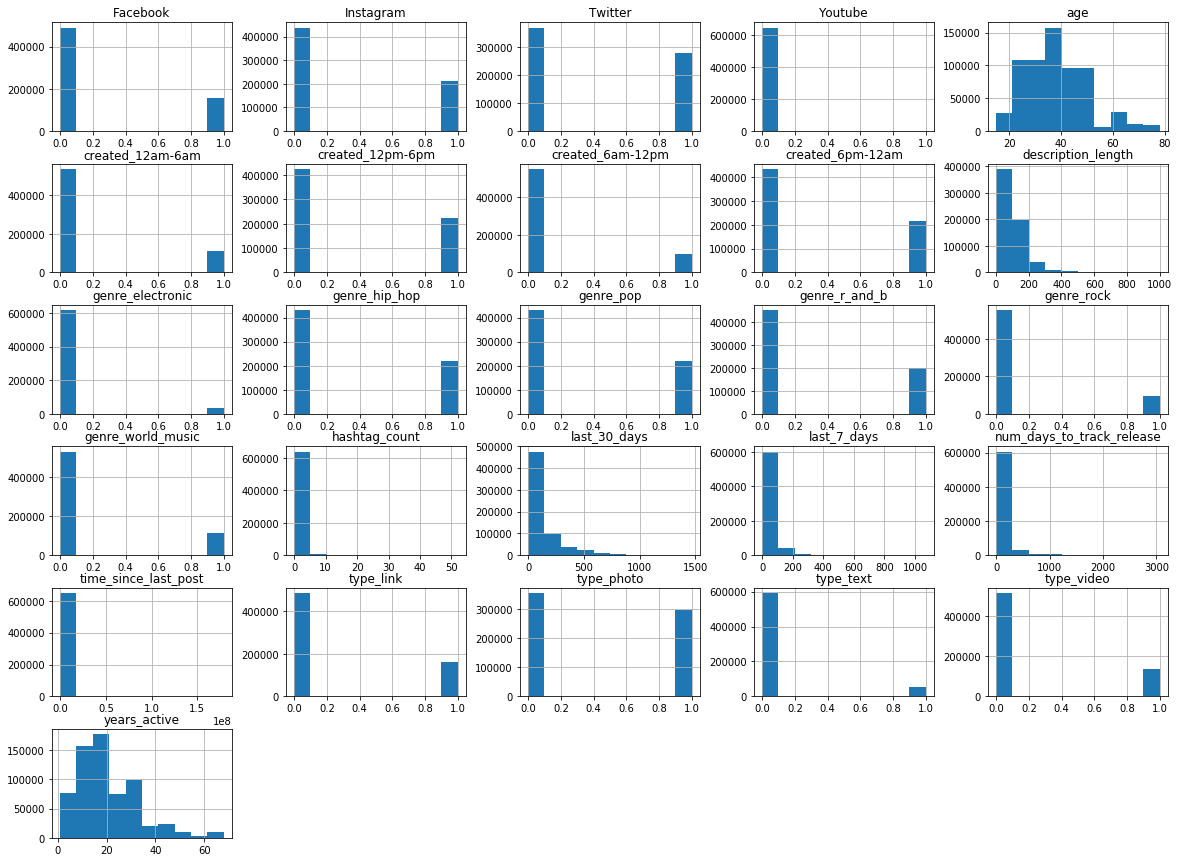

In [16]:
#Check for skew
df2.hist(figsize = (20,15))
plt.show()

In [17]:
df2.describe()

,Facebook,Instagram,Twitter,Youtube,age,created_12am-6am,created_12pm-6pm,created_6am-12pm,created_6pm-12am,description_length,...,type_text,type_video,years_active,num_days_to_track_release,genre_electronic,genre_hip_hop,genre_pop,genre_r_and_b,genre_rock,genre_world_music
count,648894.000000,648894.000000,648894.000000,648894.000000,648894.000000,648894.000000,648894.000000,648894.000000,648894.000000,648894.000000,...,648894.000000,648894.000000,648894.000000,648894.000000,648894.000000,648894.000000,648894.000000,648894.000000,648894.000000,648894.000000
mean,0.243943,0.325207,0.428902,0.001948,38.137452,0.174814,0.344255,0.151063,0.329867,101.378313,...,0.087410,0.206669,20.224759,86.745284,0.048994,0.336064,0.336392,0.305373,0.148528,0.178596
std,0.429459,0.468453,0.494920,0.044092,12.045193,0.379809,0.475125,0.358111,0.470165,102.979097,...,0.282436,0.404916,12.259262,184.464335,0.215856,0.472361,0.472475,0.460566,0.355623,0.383014
min,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,38.000000,...,0.000000,0.000000,11.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,38.000000,0.000000,0.000000,0.000000,0.000000,80.000000,...,0.000000,0.000000,18.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,45.000000,0.000000,1.000000,0.000000,1.000000,135.000000,...,0.000000,0.000000,28.000000,83.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,78.000000,1.000000,1.000000,1.000000,1.000000,1000.000000,...,1.000000,1.000000,68.000000,3064.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
# Most of the continuous features appear skewed right
skews = ['years_active','num_days_to_track_release','time_since_last_post','last_7_days','last_30_days',
        'hashtag_count','description_length','age']

Non-positive values can't be boxcoxed...

num_days_to_track_release

time_since_last_post

last_7_days

last_30_days

hashtag_count

In [19]:
#df2['age'], _ = boxcox(df2['age'])

In [20]:
#Necessary to use this method instead of boxcox since we have 'zero' values in many of the features and
#boxcox is only capable of working with positive values.
pt = PowerTransformer(method='yeo-johnson', standardize=False)
for skew in skews:
    df2[skew] = pt.fit_transform(np.array(df2[skew]).reshape(-1, 1))

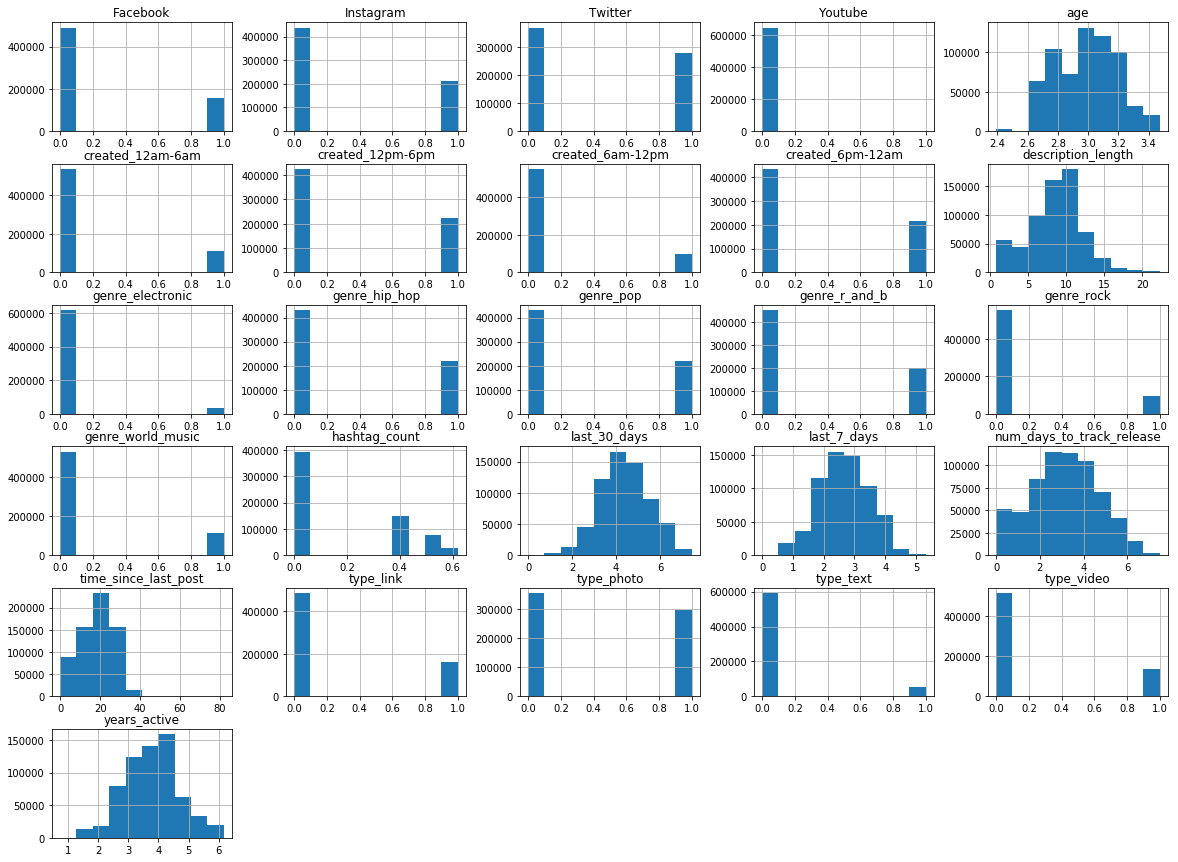

In [21]:
#Check for skew
df2.hist(figsize = (20,15))
plt.show()

In [22]:
scaler = StandardScaler()
df2_norm = scaler.fit_transform(df2)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [23]:
df2_norm.shape

(648894, 26)

## Dimensionality Reduction

### PCA

In [24]:
pca_nd = PCA(n_components=13)
df2_norm_pca_nd = pca_nd.fit_transform(df2_norm)

In [26]:
# to be used for charting in 3D
pca_3d = PCA(n_components=3)
df2_norm_pca_3d = pca_3d.fit_transform(df2_norm)

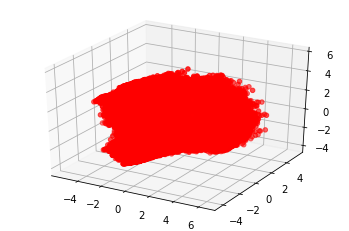

CPU times: user 40.2 s, sys: 716 ms, total: 40.9 s
Wall time: 40.7 s


In [28]:
%%time
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2_norm_pca_3d[:, 0], df2_norm_pca_3d[:, 1], df2_norm_pca_3d[:, 2], c='r', marker='o')
plt.show()

array([0.13342223, 0.23157231, 0.32416849, 0.38552768, 0.44288368,
       0.49757261, 0.5499724 , 0.59880018, 0.64443793, 0.68770698,
       0.73009782, 0.76910205, 0.80686447, 0.84356917, 0.87728448,
       0.90565492, 0.93055186, 0.95129195, 0.97025767, 0.98776091,
       0.99458247, 0.99744442, 1.        , 1.        , 1.        ,
       1.        ])

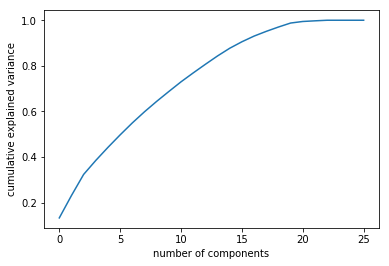

In [29]:
# Use variance ratio to understand how many components we should use
# based on PCA, we need 16 components to capture all variance
pca = PCA()
df2_norm_pca_n = pca.fit(df2_norm)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
np.cumsum(pca.explained_variance_ratio_)

### Kernel PCA

In [23]:
# # this kills the kernel everytime
# from sklearn.decomposition import KernelPCA
# kpca = KernelPCA(n_components=3, kernel="poly")
# df2_norm_kpca = kpca.fit_transform(df2_norm)

### t-SNE (with PCA initialization)

In [ ]:
# %%time
# # we can also adjust perplexity, learning rate, and number of iterations
# tsne = TSNE(n_components=3, random_state=0)  
# df2_norm_tsne = tsne.fit_transform(df2_norm_pca)

In [ ]:
# plt.scatter(df2_norm_tsne[:, 0], df2_norm_tsne[:, 1])
# plt.axis('equal')

## GMM Modeling

### Get Best K using Silhouette Score 
Do not rerun these 3 cells, they take too long

In [25]:
# function to run GMM with given dataset & automatically choose best k
# prints distribution of posts across clusters
def find_best_k(dataset):
    best_score = -np.inf
    best_k = None
    best_model = None
    best_cluster_assignments = None

    for k in range(4, 11):
        candidate_gmm = GaussianMixture(n_components=k, n_init=1, random_state=0)
        candidate_gmm.fit(dataset)
        cluster_assignments = candidate_gmm.predict(dataset)
        score = silhouette_score(dataset, cluster_assignments)

        print('k =', k, 'has silhouette score', score)

        if score > best_score:
            best_score = score
            best_k = k
            best_model = candidate_gmm
            best_cluster_assignments = cluster_assignments

    print('Best k according to Silhouette Score:', best_k)

    gmm_cluster_assignments = best_model.predict(dataset)
    
    # print breakdown of posts by gmm cluster assignment
    print('Distribution of posts by cluster:')
    y = np.bincount(gmm_cluster_assignments)
    ii = np.nonzero(y)[0]
    cluster_distribution = pd.DataFrame(np.vstack((ii,y[ii])).T, columns = ['Cluster', 'Count of Posts'])
    print(cluster_distribution)
    
    return gmm_cluster_assignments

In [26]:
%%time
# find best k with 3 Dimensions for visualization
gmm_3d = find_best_k(df2_norm_pca_3d)

In [27]:
%%time
# find best k with 13 Dimensions for analysis (captures 80% of variance according to PCA)
gmm_nd = find_best_k(df2_norm_pca_nd)

k = 4 has silhouette score 0.08631805278666525
k = 5 has silhouette score 0.10361809970693321
k = 6 has silhouette score 0.10577283343941528
k = 7 has silhouette score 0.1123475867694714
k = 8 has silhouette score 0.1057548787618483
k = 9 has silhouette score 0.10460642584327766
k = 10 has silhouette score 0.09612645702355428
Best k according to Silhouette Score: 7
Distribution of posts by cluster:
   Cluster  Count of Posts
0        0           80644
1        1           91000
2        2           67662
3        3          137856
4        4           56720
5        5           90792
6        6          124220
CPU times: user 16h 33min 15s, sys: 2h 26min 54s, total: 19h 10s
Wall time: 14h 5min 17s


## Run GMM

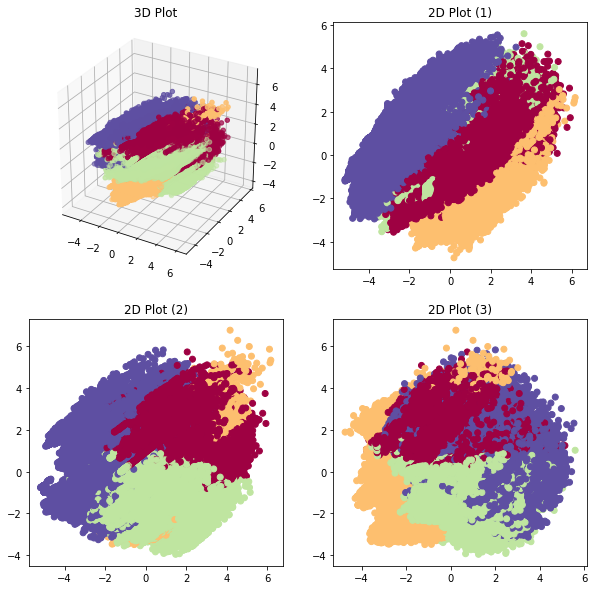

CPU times: user 2min 17s, sys: 4.63 s, total: 2min 21s
Wall time: 2min 12s


In [64]:
%%time
# run GMM with 3 Dimensions and 4 clusters & visualize
gmm_3d = GaussianMixture(n_components=4, n_init=1, random_state=0)
gmm_3d.fit(df2_norm_pca_3d)
gmm_3d_clusters = gmm_3d.predict(df2_norm_pca_3d)
# plot 3D Clusters
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(221, projection='3d')
ax.scatter(df2_norm_pca_3d[:, 0], df2_norm_pca_3d[:, 1], df2_norm_pca_3d[:, 2], c=gmm_3d_clusters, cmap='Spectral')
ax.title.set_text('3D Plot')
# plot 3D Clusters in 2D (1)
ax1 = fig.add_subplot(222)
ax1.scatter(df2_norm_pca_3d[:, 0], df2_norm_pca_3d[:, 1], c=gmm_3d_clusters, cmap='Spectral')
ax1.title.set_text('2D Plot (1)')
# plot 3D Clusters in 2D (2)
ax2 = fig.add_subplot(223)
ax2.scatter(df2_norm_pca_3d[:, 0], df2_norm_pca_3d[:, 2], c=gmm_3d_clusters, cmap='Spectral')
ax2.title.set_text('2D Plot (2)')
# plot 3D Clusters in 2D (3)
ax3 = fig.add_subplot(224)
ax3.scatter(df2_norm_pca_3d[:, 1], df2_norm_pca_3d[:, 2], c=gmm_3d_clusters, cmap='Spectral')
ax3.title.set_text('2D Plot (3)')
plt.show()

In [54]:
%%time
# run GMM with 10 Dimensions and 6 clusters & add cluster assignments back to original df
gmm_nd = GaussianMixture(n_components=6, n_init=1, random_state=0)
gmm_nd.fit(df2_norm_pca_nd)
gmm_nd_clusters = gmm_nd.predict(df2_norm_pca_nd)
# add cluster assignments as new column to original dataset
df['Cluster'] = gmm_nd_clusters.tolist()

CPU times: user 21 s, sys: 2.77 s, total: 23.8 s
Wall time: 12.6 s


## Calculate Artist Distribution in each Cluster

In [63]:
# convert clusters to dummy variables
# this df has cluster per post: ready for qualitative analysis 
df1 = df.copy()
df_cluster_ohe = pd.get_dummies(df1["Cluster"],prefix='cluster')
df1_dropcluster = df1.drop(['Cluster'], axis=1)
df_with_clusters = pd.concat([df1_dropcluster, df_cluster_ohe], axis=1)
df_with_clusters.head()

,Facebook,Instagram,Twitter,Youtube,age,artist_name_x,created_12am-6am,created_12pm-6pm,created_6am-12pm,created_6pm-12am,...,type_text,type_video,years_active,num_days_to_track_release,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5
702,1,0,0,0,37,AdamLambert,0,1,0,0,...,0,0,18,76,0,0,0,0,0,1
703,1,0,0,0,37,AdamLambert,0,1,0,0,...,0,1,18,73,0,0,0,0,0,1
704,1,0,0,0,37,AdamLambert,0,0,1,0,...,0,0,18,71,0,0,1,0,0,0
705,1,0,0,0,37,AdamLambert,0,1,0,0,...,0,0,18,71,0,0,0,0,0,1
706,1,0,0,0,37,AdamLambert,0,1,0,0,...,0,0,18,70,0,0,0,0,0,1


In [97]:
# create df with each artists distribution across each cluster
# this df has distribution of each artist by cluster: ready for qualitative analysis 
df_artists = df[['artist_name_x', 'Cluster']]
df1_artists = df_artists.copy()
df1_artists_ohe = pd.get_dummies(df1_artists["Cluster"],prefix='cluster')
df1_artists_dropcluster = df1_artists.drop(['Cluster'], axis=1)
df_artists_by_cluster = pd.concat([df1_artists_dropcluster, df1_artists_ohe], axis=1)
cluster_columns = df_artists_by_cluster.drop(['artist_name_x'], axis=1).columns.values.tolist()
# sum cluster count grouped by artist
df_artists_by_cluster = df_artists_by_cluster.groupby(['artist_name_x']).sum()
df_artists_by_cluster['clusters_sum'] = df_artists_by_cluster.sum(axis=1)
for c in cluster_columns:
    df_artists_by_cluster[c] = df_artists_by_cluster[c]/df_artists_by_cluster['clusters_sum']
df_artists_by_cluster = df_artists_by_cluster.drop(['clusters_sum'], axis=1)
df_artists_by_cluster.head()

,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5
artist_name_x,,,,,,
1future,0.043091,0.214710,0.017831,0.110698,0.613670,0.000000
21savage,0.565017,0.021864,0.048331,0.141542,0.223245,0.000000
ASAPferg,0.117685,0.309493,0.073147,0.202861,0.296814,0.000000
AdamLambert,0.000000,0.000000,0.225131,0.102094,0.028796,0.643979
Adele,0.377049,0.180328,0.229508,0.049180,0.163934,0.000000
